In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 507s 3us/step


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

In [3]:
x_train = x_train.astype("float32") / 255.0
x_val = x_val.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

In [ ]:
model = models.Sequential([
    data_augmentation,

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),

    layers.Dense(10, activation='softmax')
])

c:\Users\Classic\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.3580 - loss: 1.7492 - val_accuracy: 0.4668 - val_loss: 1.4630
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 81ms/step - accuracy: 0.4772 - loss: 1.4520 - val_accuracy: 0.5444 - val_loss: 1.2782
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 113ms/step - accuracy: 0.5165 - loss: 1.3561 - val_accuracy: 0.5746 - val_loss: 1.1888
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 73s 104ms/step - accuracy: 0.5420 - loss: 1.2855 - val_accuracy: 0.6030 - val_loss: 1.1086
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 78s 110ms/step - accuracy: 0.5629 - loss: 1.2367 - val_accuracy: 0.6268 - val_loss: 1.0371
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 113ms/step - accuracy: 0.5752 - loss: 1.2022 - val_accuracy: 0.5880 - val_loss: 1.1447
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 109s 151ms/step - accuracy: 0.5882 - loss: 1.1699 - val_accuracy: 0.6200 - val_loss: 1.0583
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 89s 126ms/step - accuracy: 0.5985 - loss: 1

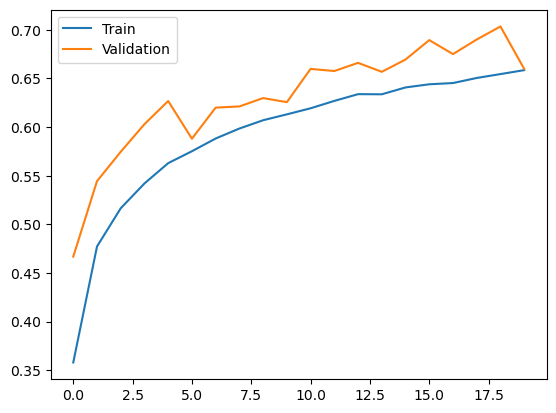

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'])
plt.show()

In [18]:
val_loss, val_acc = model.evaluate(x_val, y_val)
print("Validation Accuracy:", val_acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6598 - loss: 0.9781
Validation Accuracy: 0.6597999930381775


In [19]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
